In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# 학습시간 대비 합격 데이터
pass_time = [8, 9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5, 20, 20, 20]
fail_time = [1, 2, 2.1, 2.6, 2.7, 2.8, 2.9, 3, 3.2, 3.4, 3.5, 3.6, 3, 5, 5.2, 5.4]

In [4]:
# X
X = np.hstack((pass_time, fail_time))
X

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 15. , 16. , 16. ,
       16.5, 17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,
        5.2,  5.4])

In [7]:
# y
y1 = [1] * len(pass_time)
y0 = [0] * len(fail_time)
y = np.hstack((y1, y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

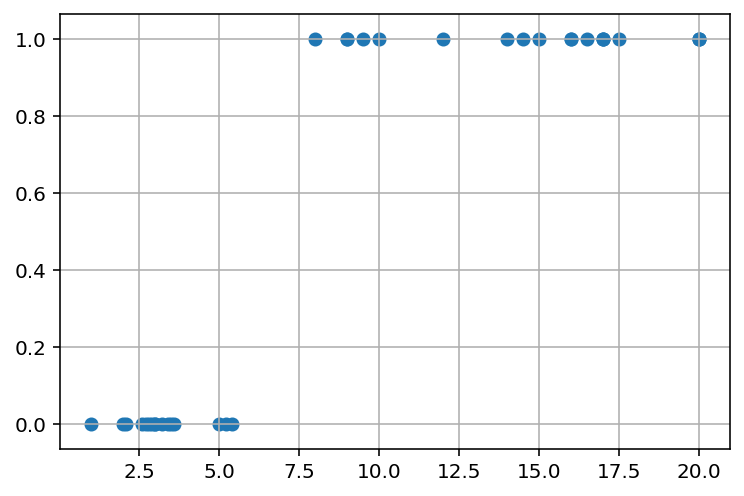

In [10]:
# 시각화
plt.scatter(X, y)
plt.grid()
plt.show()

In [17]:
# 모델 학습
model = LogisticRegression()
model.fit(X.reshape(-1,1), y)

model.coef_, model.intercept_

(array([[1.32952239]]), array([-9.1854821]))

In [24]:
model.predict([[6.9]])

array([0])

In [26]:
# 예측확률
model.predict_proba([[6.9]])

array([[0.50294437, 0.49705563]])

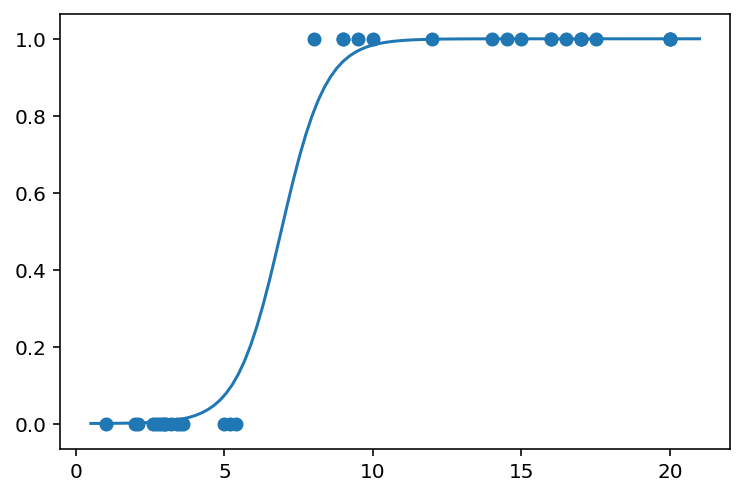

In [35]:
# 결과 시각화
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.scatter(X, y)

xx = np.linspace(0.5, 21, 100)
yy = sigmoid(model.coef_ * xx + model.intercept_)
plt.plot(xx, yy[0])
plt.show()

w값을 조절하면 다음과 같이 움직인다
- w값이 작아질수록 기울기가 완만해진다.

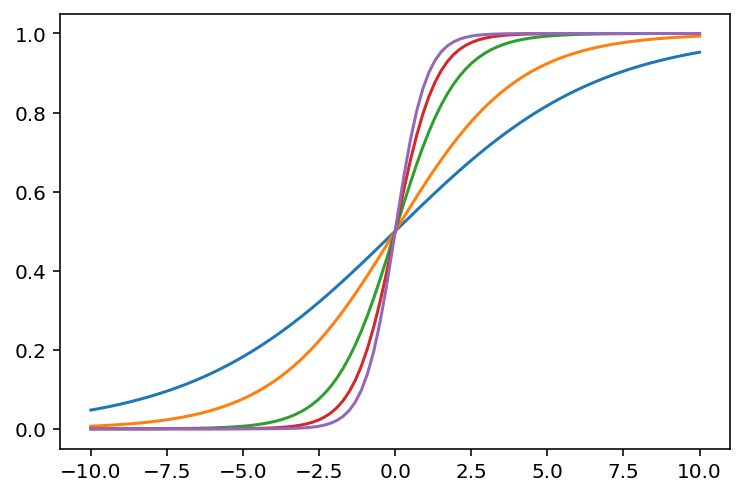

In [44]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

W_list = [0.3, 0.5, 1, 1.5, 2]
b_list = [0]

xx = np.linspace(-10, 10, 100)

for W in W_list:
    for b in b_list:
        yy = sigmoid(W * xx + b)
        plt.plot(xx, yy)

b값을 조절하면 다음과 같이 움직인다.
- -는 오른쪽
- +는 왼쪽

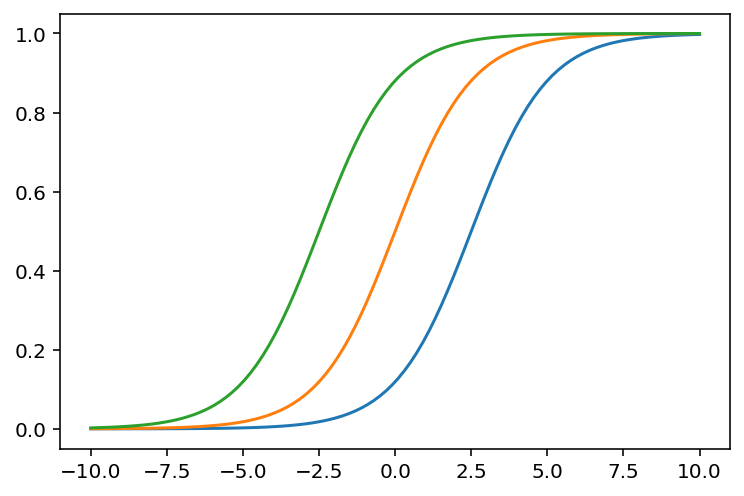

In [45]:
W_list = [0.8]
b_list = [-2, 0, 2]

xx = np.linspace(-10, 10, 100)

for W in W_list:
    for b in b_list:
        yy = sigmoid(W * xx + b)
        plt.plot(xx, yy)

In [1]:
from mglearn.datasets import make_forge
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [3]:
X, y = make_forge()
X.shape, y.shape

((26, 2), (26,))

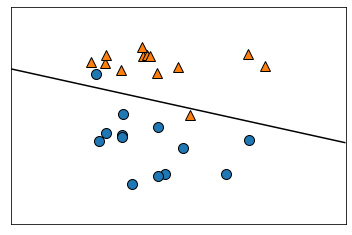

In [16]:
model = LogisticRegression(C=1) # C값이 작으면 영향력이 떨어진다. default=1
model.fit(X, y)

mglearn.plots.plot_2d_separator(model, X, fill=False)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=66)

In [18]:
X_train.shape

(426, 30)

In [35]:
# c값을 올렸기 때문에 정확도는 올라간다.
model = LogisticRegression(C=1, max_iter=10000)
model.fit(X_train, y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(0.9577464788732394, 0.965034965034965)

NameError: name 'rotation' is not defined

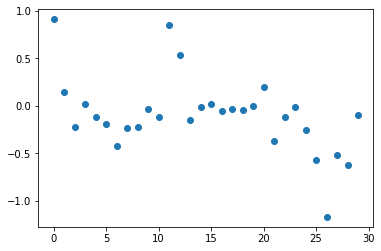

In [42]:
plt.plot(model.coef_.T, 'o')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.ylim(-5,5)
plt.show()

In [31]:
# c값을 올렸기 때문에 정확도는 올라간다.
model = LogisticRegression(C=100, max_iter=10000)
model.fit(X_train, y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(0.9694835680751174, 0.972027972027972)

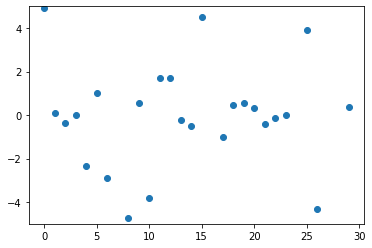

In [32]:
plt.plot(model.coef_.T, 'o')
plt.ylim(-5,5)
plt.show()

In [33]:
# c값을 올렸기 때문에 정확도는 올라간다.
model = LogisticRegression(C=0.01, max_iter=10000)
model.fit(X_train, y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(0.9483568075117371, 0.9370629370629371)

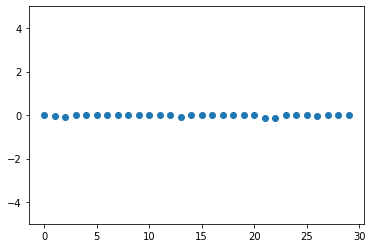

In [34]:
plt.plot(model.coef_.T, 'o')
plt.ylim(-5,5)
plt.show()

In [46]:
model = LogisticRegression(C=100, penalty='l1', solver='liblinear', max_iter=10000)
model.fit(X_train, y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(0.9788732394366197, 0.958041958041958)

(-5, 5)

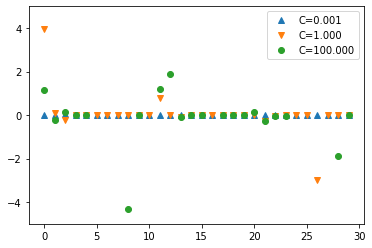

In [52]:
# C값을 올리면 분산과 정확도가 올라간다.

for C, marker in zip([0.001, 1, 100], ['^', 'v', 'o']):
    model = LogisticRegression(C=C, penalty='l1', solver='liblinear', max_iter=10000)
    model.fit(X_train, y_train)
    plt.plot(model.coef_.T, marker, label='C={:.3f}'.format(C))
plt.legend()
plt.ylim(-5, 5)

In [58]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

wine = load_wine()
wine.keys()
wine.feature_names

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['등급'] = wine.target
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,등급
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [85]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [86]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,등급
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [84]:
# X, y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

model = LogisticRegression(C=1, max_iter=10000)
X_train.shape, y_train.shape
model.fit(X_train, y_train)

model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.9111111111111111)